Für unsere Analysen benutzen wir NiLearn ([nilearn.github.io](https://nilearn.github.io)). Das Programm erlaubt es uns vor allem, aus den 3D Bildern Listen zu machen, mit denen wir dann sehr einfache Rechnungen (z.B. Subtraktion) durchführen können. Die Ergebnisse dieser Berechnungen machen wir dann wieder zu 3D-Hirnbildern, die wir uns anschauen können.

In [1]:
from nilearn import image, datasets, input_data, plotting

Hier legen wir fest, wo die Daten unseres ersten Runs liegen

In [2]:
fmri_img = '../data/wrrun001.nii.gz'

Schauen wir uns die Rohdaten an:

In [3]:
%%bash

fslview ../data/wrrun001.nii.gz -l Grey -b 0,1500

Wir sehen, dass wir Nichts sehen. Wenn wir aber mit dem timecourse Tool von FSLView an eine bestimmte Stelle gehen, sehen wir, dass da viel passiert, auch wenn es nicht besonders systematisch aussieht. Aber warum spiegeln
sich diese Fluktuationen nicht in den Bildern wieder? 

Wenn wir mehrere Zeitserien gleichzeitig anschauen, dann sehen wir, dass die Verläufe auf ganz unterschiedlichem absolutem Niveau stattfinden. D.h. die Unterschiede zwischen zwei Voxeln sind viel viel Größer als die zeitlichen Fluktuationen innerhalb eines einzelnen Voxels über die Messung hinweg. 

Uns interessieren aber gerade die *Unterschiede innerhalb eines Voxels über die Zeit*. Auch wenn wir irgendwann Hirnkarten haben wollen, mit deren Hilfe wir dann Voxel miteinander vergleichen, so brauchen wir erst irgendeinen *interpretierbaren Wert pro Voxel*. Und dieser Wert sollte widerspiegeln, wie viel mehr zu einem Zeitpunkt in Voxel X passiert, als zu allen anderen Zeitpunkten im selben Voxel X. Das heißt, wenn unsere Versuchsperson zu einem bestimmten Zeitpunkt an Gesichter gedacht hat, dann würden wir gerne wissen, wie viel stärker (oder wie viel schwächer) diese Aktivität im Vergleich zum Denken an Wörter, Orte, Bewegungen oder an Nichts ist. Erst wenn wir diese zeitlichen Informationen haben, können wir Voxel *im Hinblick auf diese zeitlichen Unterschiede* vergleichen und Hirnkarten erstellen.

### Visualisierung von Zeitverläufen

![volumes in time](https://raw.githubusercontent.com/mwegrzyn/mindReading2017/master/content/volumesInTime.png)
**Von 4D-Daten (3D Gehirn + Zeit) zu 2D Daten (Voxel + Zeit)** Diese Abbildung illustriert, dass sich hinter der Serie von 3-Dimensionalen Hirnvolumen, die wir beim fMRT erheben, Zeitverläufe verstecken. Für jedes Voxel im Gehirn können wir einen Zeitverlauf extrahieren und so eine Tabelle mit Zeitpunkten in Zeilen und Voxeln in Spalten erstellen. Mit so einer Tabelle können wir einfach arbeiten (sogar mit einer Tabellenkalkulation wie LibreOffice) und z.B. Voxel im Hinblick auf Ihre Zeitverläufe korrelieren (Konnektivität) oder Zeitpunkte im Hinblick auf Ihre Voxelwerte korrelieren (Aktivitätsmuster). *Abbildung adaptiert aus [Abraham 2014](http://journal.frontiersin.org/article/10.3389/fninf.2014.00014/full)*.

picken wir uns ein paar Stellen heraus und schauen uns die Signalverläufe an:

In [4]:
# hier verwenden wir ein Masker-Objekt um an drei Stellen (die jeweils durch x,y und z-Koordinaten definiert sind)
# die Zeitverläufe zu extrahieren
sphereMasks = input_data.NiftiSpheresMasker(seeds=[(-52,10,26),(-36,-48,64),(52,-8,-2)],
                                            # für jede Stelle nehmen wir nicht nur ein Voxel,
                                            # sondern Voxel in einem Radius von 10mm;
                                            # das macht das Ganze etwas repräsentativer
                                            radius=10).fit()

Die 3 Koordinaten die wir verwenden sind an den folgenden Stellen verortet:

In [5]:
# wir laden Module zum Erstellen von Abbildungen
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

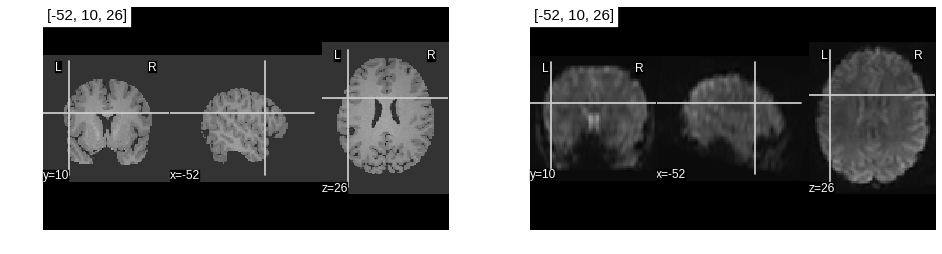

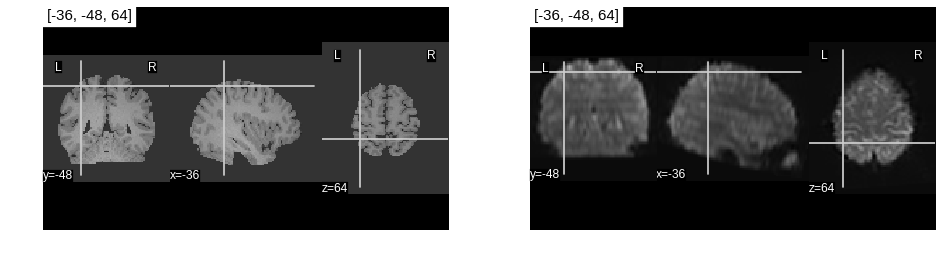

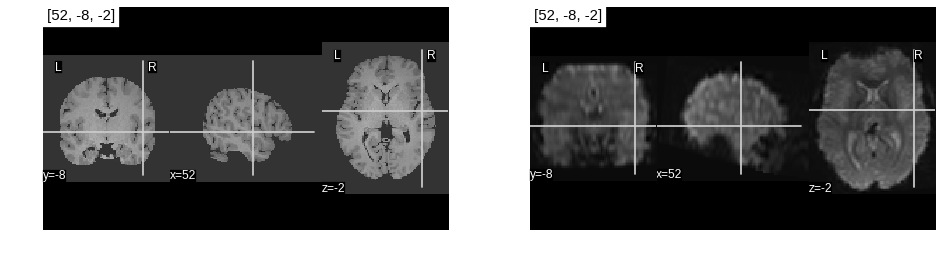

In [6]:
# für jede xyz Koordiante
for seed in sphereMasks.seeds_:
    
    # eine Abbildung mit zwei Teilen
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
    
    # zeig mir die entsprechende Stelle auf dem strukturellen Bild
    plotting.plot_anat('../data/wbet2mm.nii.gz',cut_coords=seed,title=seed,axes=ax1)
    # zeig mir die entsprechende Stelle auf der gemittelten funktionllen Serie
    plotting.plot_anat(image.mean_img(fmri_img),cut_coords=seed,title=seed,axes=ax2)

    plt.show()

Wir haben nun eine Maske, die Zeitverläufe aus drei Stellen des Gehirns ausliest (und an sonsten nichts macht; d.h. die Daten sind alle in absoluten Werten)

In [7]:
sphereMasks

NiftiSpheresMasker(allow_overlap=False, detrend=False, high_pass=None,
          low_pass=None, mask_img=None, memory=Memory(cachedir=None),
          memory_level=1, radius=10,
          seeds=[(-52, 10, 26), (-36, -48, 64), (52, -8, -2)],
          smoothing_fwhm=None, standardize=False, t_r=None, verbose=0)

Mit Hilfe der Maske extrahieren wir nun die Daten aus unserem run

In [8]:
thisTimeCourse = sphereMasks.transform(fmri_img)

In [9]:
thisTimeCourse

array([[733.72847824, 882.11061829, 852.5979292 ],
       [739.58134165, 890.46113805, 855.79664891],
       [738.41589467, 885.79049234, 845.77425365],
       [735.08135574, 881.42101098, 843.31639824],
       [728.86626838, 881.86555318, 844.19083779],
       [731.83515835, 884.47871491, 842.77524724],
       [732.87116372, 885.63282395, 848.28938934],
       [730.74293564, 882.67609865, 845.1670827 ],
       [727.91659679, 880.28048387, 842.03887087],
       [728.67151543, 885.93516933, 845.2508182 ],
       [731.2633004 , 879.35833044, 844.15198168],
       [736.18692416, 891.31361032, 854.60628206],
       [726.22617901, 886.20822501, 846.56708356],
       [728.68580598, 884.98502533, 840.32518667],
       [728.16461449, 883.82383008, 845.09126014],
       [725.81423342, 882.79278507, 845.75512085],
       [727.01534771, 885.13005664, 843.35100261],
       [732.70085823, 887.30174686, 847.47482835],
       [726.54942875, 882.21029779, 842.73166698],
       [724.41742135, 881.07284

![brain 2 array](https://raw.githubusercontent.com/mwegrzyn/mindReading2017/master/content/brain2array.png)
**Von Gehirnen zu Listen.** Wenn wir uns für einen bestimmten Zeitpunkt die Aktivierung im Gehirn anschauen (ein Zeitpunkt = ein Volumen = eine Beobachtung), dann können wir alle Voxel nehmen und in eine einfache Liste überführen. Da die Farben nur verschiedene Zahlen repräsentieren (z.B. rot = niedrige Zahl, gelb = hohe Zahl), haben wir jetzt eine einfache Liste mit der wir arbeiten können. In diesem Beispiel haben wir eine Beobachtung (= eine Zeile = die Liste) und so viele Feature (= Spalten der Liste) wie wir Voxel haben.  
Da es viele Wege gibt, aus einem 3D-Gehirn eine 1-dimensionale Liste zu machen, aber nur einen Weg zurück von der Liste zum Gehirn, brauchen wir die [Masker-Objekte](https://nilearn.github.io/manipulating_images/masker_objects.html) von nilearn.   *Abbildung adaptiert von [Peelen & Kastner 2011](http://sci-hub.cc/10.1073/pnas.1101042108).*

![](https://camo.githubusercontent.com/70dd5e35f7caaaa56b78381bc94c41fceae1ce62/687474703a2f2f7777772e616e6e75616c726576696577732e6f72672f6e613130312f686f6d652f6c697465726174756d2f7075626c69736865722f61722f6a6f75726e616c732f636f6e74656e742f6e6575726f2f323031342f6e6575726f2e323031342e33372e69737375652d312f616e6e757265762d6e6575726f2d3036323031322d3137303332352f32303134303731312f696d616765732f6d656469756d2f6e653337303433352e66312e676966)


**Von Listen zu Tabellen.** Wenn wir die oben Beschriebene Prozedur für alle Zeitpunkte durchlaufen, dann können wir die Listen (jede Beobachtung = Volumen), untereinander in einer Tabelle anordnen. 
Letztlich haben wir unsere Daten immer in einer Form, wo die Beobachtungen in Zeilen sind und die Feature in Spalten. 
Die Beobachtungen können einzelne Zeitpunkte (alle 3 Sekunden) sein, oder gemittelte Blöcke (30 Sekunden) oder Mittlungen aller Blöcke einer Bedingung (2 Minuten pro Run). Die Feature können einzelne Voxel oder ganze Hirnregionen (z.B. die Mittlung aller Voxel in der FFA) sein.   *Abbildung aus [Haxby 2014](http://haxbylab.dartmouth.edu/publications/HCG14.pdf).*

### Daten visualisieren

Wir können diese Daten auch visualisieren. Jede Spalte ist eine Region, jede Zeile ist ein Zeitpunkt.

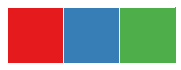

In [10]:
# wir definieren drei Farben, die wir nachfolgend einheitlich anwenden:
myPalette = sns.color_palette('Set1',3)
sns.palplot(myPalette)

Wenn wir die Daten so betrachten, also mit einer gemeinsamen Skala, dann **überwiegen die Unterschiede zwischen den Voxeln** und die Unterschiede über die Zeit hinweg scheinen minimal zu sein:

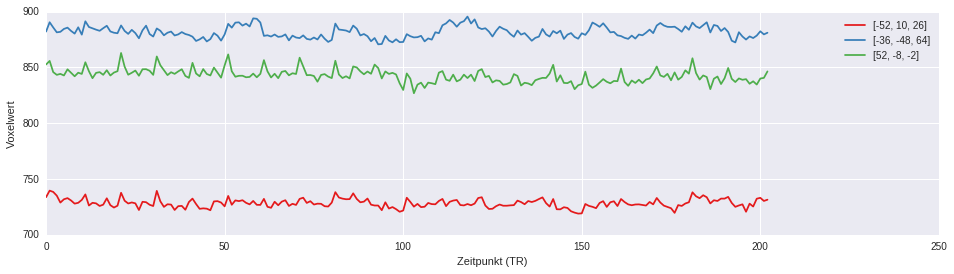

In [11]:
# wir erstellen eine Abbildung
plt.figure(figsize=(16,4))
# für alle 3 Regionen (Spalten)
for c in range(3):
    # füge die Werte (Zeipunkte) eine Region (Spalte) in die Abbildung ein
    plt.plot( thisTimeCourse[:,c],
             # Farbe
             color=myPalette[c],
             # Beschriftung
             label=sphereMasks.seeds_[c]  )
    
# Nachdem wir alle 3 Regionen der Abbildung hinzugefügt haben:

# Achsenbeschriftung
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
# Legende
plt.legend(loc='best')
# Abbildung zeigen
plt.show()

Schauen wir uns die selben 3 Zeitverläufe noch mal an, aber dieses Mal einzeln. Da jeder Verlauf seine eigene Skalierung auf der y-Achse bekommt, sind Unterschiede über die Zeit hinweg plötzlich gut sichtbar:

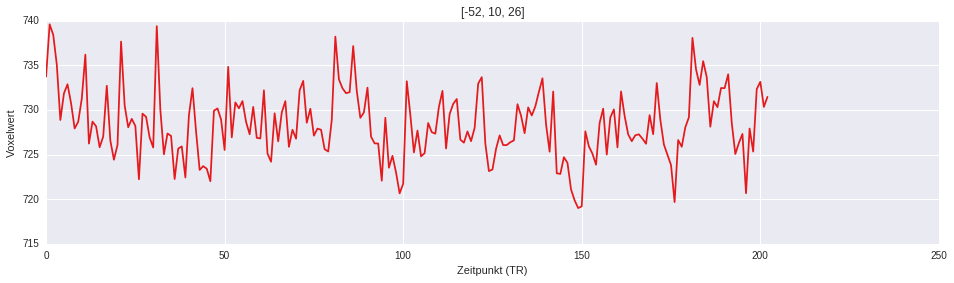

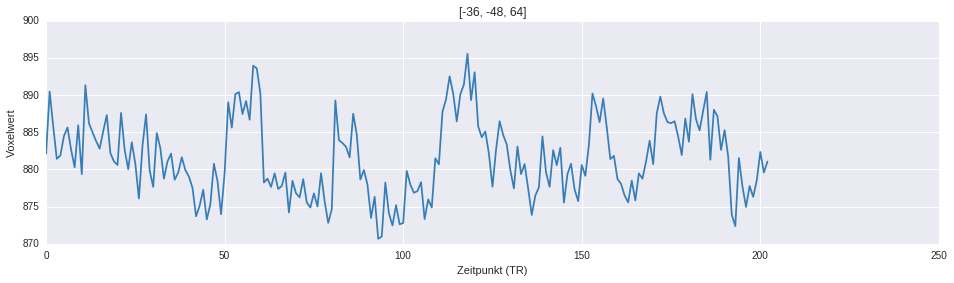

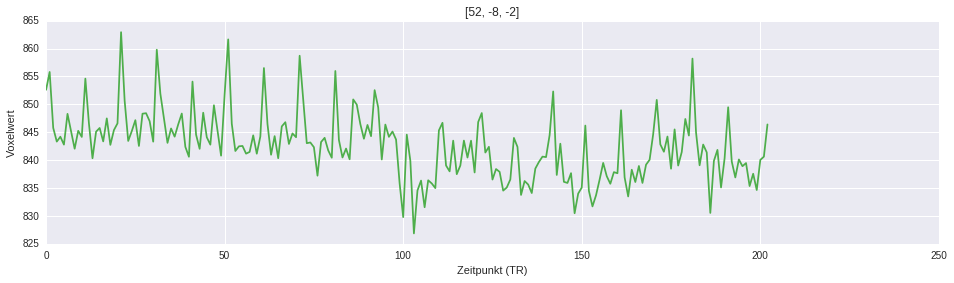

In [12]:
# für alle 3 Regionen (Spalten)
for c in range(3):
    # wir erstellen eine Abbildung
    plt.figure(figsize=(16,4))
    # zeig die Werte (Zeipunkte) eine Region (Spalte)
    plt.plot( thisTimeCourse[:,c],color=myPalette[c]  )
    # Achsenbeschriftung
    plt.ylabel('Voxelwert')
    plt.xlabel('Zeitpunkt (TR)')
    plt.title(sphereMasks.seeds_[c])
    # Abbildung zeigen (jedes Mal)
    plt.show()

Was könnten wir tun, um die Zeitverläufe der drei Voxel so zu kombinieren, dass sie gleich skaliert sind und wir die unterschiedlichen Zeitverläufe in mehreren Voxeln *gleichzeitig* gut sehen können?  

Eine einfache Lösung wäre, den Mittelwert von jedem Zeitverlauf zu finden und von allen Werten den Mittelwert abzuziehen. Dann ist der neue Mittelwert Null (Mittelwert minus Mittelwert = 0) und alle Voxel haben den gleichen Mittelwert (von 0). Jetzt sind positive Werte gleichbedeutend mit **überdurchschnittlichen Werten** dieses Voxels und negative Werte mit **unterdurchschnittlichen Werten**.

der Mittelwert für Spalte 0 ist 728
der neue Mittelwert für Spalte 0 ist 0

der Mittelwert für Spalte 1 ist 881
der neue Mittelwert für Spalte 1 ist 0

der Mittelwert für Spalte 2 ist 842
der neue Mittelwert für Spalte 2 ist 0



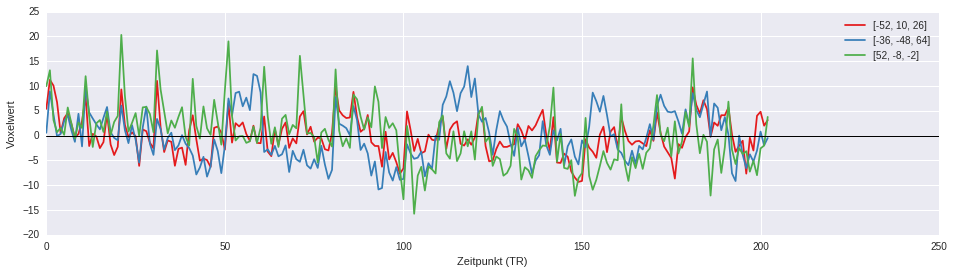

In [13]:
# Abbildung erstellen
plt.figure(figsize=(16,4))

for c in range(3):
    # die Werte des Voxels (alle Zeitpunkte)
    thisVoxel = thisTimeCourse[:,c]
    # Mittelwert aller Zeitpunkte dieses Voxels
    thisMean = thisVoxel.mean()
    # wir lassen uns den Mittelwert anzeigen (für uns zum besseren Verständnis)
    print 'der Mittelwert für Spalte %i ist %i' %(c,thisMean)
    # jeder Wert minus der Mittelwert
    thisScaled = thisVoxel-thisMean
    print 'der neue Mittelwert für Spalte %i ist %i\n' %(c,thisScaled.mean() )
    # zur Abbildung hinzufügen
    plt.plot( thisScaled , color=myPalette[c],label=sphereMasks.seeds_[c] )

# Nulllinie als Orientierung
plt.axhline(0,color='k',linewidth=1)
plt.legend(loc='best')
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
# alle zusammen zeigen
plt.show()

Jetzt können wir für jeden Zeitpunkt sagen, welche Voxel *überdurchschnittlich* viel machen und welche *unterdurchschnittlich* viel machen. Das ist schafft Vergleichbarkeit und führt uns dem Ziel interpretierbare Werte für jedes Voxel zu haben um einiges Näher.  

Es illustriert aber auch einen anderen Punkt, nämlich dass wir immer eine Referenz brauchen um ein fMRT-Bild zu interpretieren. Ein einzelnes fMRT-Volumen ist nicht interpretierbar, weil die absoluten Werte der Voxel bedeutungslos sind, bzw. keine *funktionelle* Bedeutung haben: Man kann Anhand eines einzelnen fMRT-Volumens zwar sehen, wo Luft (schwarz) oder CSF (sehr hell) etc. sind, aber das sind strukturelle und keine funktionellen Informationen.  

Ebenfalls sehen wir, dass wir immer mindestens zwei Bedingungen brauchen um den Zeitverlauf eines Voxels zu interpretieren. Wenn wir 10 Minuten lang nur Gesichter zeigen würden, würden wir nichts über Gesichterverarbeitung in einem bestimmten Voxel lernen, weil wir keinen Kontext haben, also nicht sagen können, ob Gesichter mehr oder weniger aktivieren als andere Stimuli.

### Datenbereinigung

Wir machen noch ein paar andere Dinge: 
- die Standardabweichung wird 1 (zusammen mit dem Mittelwert von 0 haben wir jetzt also z-scores)
- langsame Drifts werden entfernt

In [14]:
stdMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz', # für das ganze Gehirn
                                   standardize=True, # mittelwert 0, stdabw 1
                                   detrend=True # langsame drifts werden eliminiert
                                  ).fit()

In [15]:
stdMasker

NiftiMasker(detrend=True, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

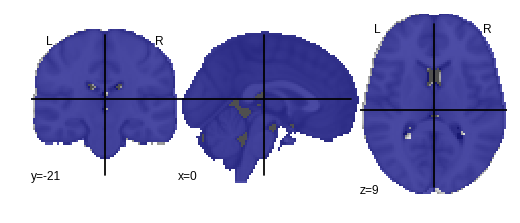

In [16]:
plotting.plot_roi(stdMasker.mask_img_);

wir wenden diese Regeln jetzt auf das ganze Gehirn an

In [18]:
thisStd = stdMasker.transform(fmri_img)

/data/martin/seminarSS18/venv/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:435: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter will change in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


das ergibt eine sehr große Tabelle

In [19]:
thisStd

array([[-0.07182101, -0.00510233,  0.12703967, ...,  0.03446315,
        -0.67740994,  0.84785367],
       [-0.05107722, -0.02695318,  0.21513463, ...,  1.70168879,
         0.87828713,  1.78842983],
       [ 0.55775233, -0.40051446, -0.88312039, ...,  0.27805443,
        -0.17897028,  0.34562449],
       ...,
       [ 0.37358573,  0.30839696,  0.04150288, ..., -0.53879817,
        -0.14204812, -1.03118132],
       [-0.96859898, -0.90439415, -0.8229714 , ...,  1.19419045,
         0.58728027,  1.60827575],
       [-2.07237054, -1.92914206, -1.69442422, ...,  0.37886365,
        -0.0626123 ,  0.11598845]])

wir haben 203 Zeitpunkte (Zeilen) und 228483 Spalten (Voxel)

In [20]:
thisStd.shape

(203, 228483)

Wir wollen aber keine Tabelle, sondern ein Hirnbild. Daher können wir jetzt, nachdem wir die Daten vorbereitet haben, das Ergebnis wieder in den 3D-Hirnraum bringen und uns anschauen

In [21]:
# Zurück von der Tabelle zum Hirnbild
stdImg = stdMasker.inverse_transform(thisStd)
# Als Datei speichern
stdImg.to_filename('../data/meinHirnbild.nii.gz')

So sehen unsere drei Voxel jetzt aus:

In [22]:
# aus dem vorverarbeitetem Hirnbild die drei Koordinaten extrahieren
stdTimeCourse = sphereMasks.transform(stdImg)

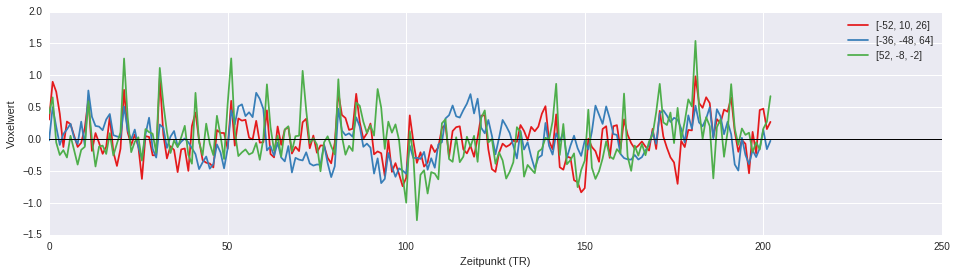

In [23]:
# Abbildung (wie oben)
plt.figure(figsize=(16,4))
for c in range(3):
    plt.plot( stdTimeCourse[:,c],color=myPalette[c],label=sphereMasks.seeds_[c] )
plt.axhline(0,color='k',linewidth=1)
plt.legend(loc='best')
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
plt.show()

### Voxel im auditorischen Kortex

Bei der Koordinate 52,-8,2 (grün) sind wir im rechten auditorischen Kortex. Hier sollte es alle 10 TR (d.h. alle 30 Sekunden) einen Effekt für das Hören der Stimme des Versuchsleiters geben:

In [24]:
import pandas as pd
import numpy as np

/data/martin/seminarSS18/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


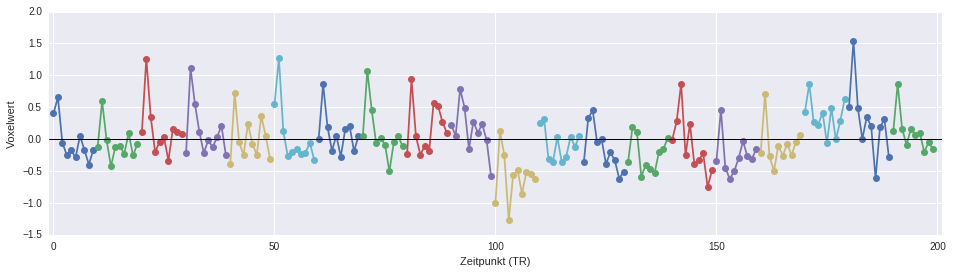

In [25]:
# daten des entsprechenden voxels
thisData =stdTimeCourse[:,2]
thisDf = pd.DataFrame( thisData )[:200]

# einteilung in 10-er blocks
block = np.array([[i]*10 for i in range(20)]).flatten()
tr = np.array(np.arange(200)).flatten()
thisDf.index = [block,tr]

# Abbildung
plt.figure(figsize=(16,4))
for i in thisDf.index.levels[0]:
    plt.plot(thisDf.loc[i].index,thisDf.loc[i].values,'-o')

plt.axhline(0,color='k',linewidth=1)
plt.legend(loc='best')
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
plt.xlim(-1,201)
plt.show()

Wir legen die Zeitverläufe der 20 Blocks übereinander, um einen typischen Zeitverlauf für diese Stelle im Gehirn zu bekommen.

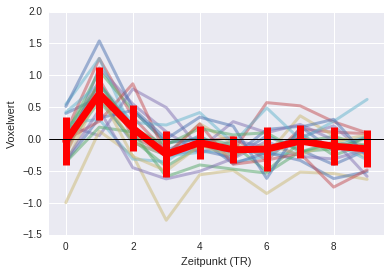

In [26]:
thisDf = pd.DataFrame( thisData )[:200]
block = np.array([[i]*10 for i in range(20)]).flatten()
tr = np.array([np.arange(0,10)]*20).flatten()
thisDf.index = [block,tr]
thisDf = thisDf.unstack().T

# Abbildung
plt.figure(figsize=(6,4))

for c in thisDf.columns:
    plt.plot(thisDf[c].values,alpha=0.5,linewidth=3,zorder=1)
plt.errorbar( range(10),thisDf.mean(axis=1).values,yerr=thisDf.std(axis=1).values,c='r',linewidth=7 )

plt.axhline(0,color='k',linewidth=1)
plt.legend(loc='best')
plt.xlim(-0.5,9.5)
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
plt.show()

Aus dieser Visualisierung sehen wir, dass die hämodynamische Antwortfunktion um ca. 1TR, d.h. um ca. 3 Sekunden verschoben ist. Das ist etwas kürzer als wir erwarten würden (5-6 Sek), könnte aber auch am Timing der Instruktionen liegen. In jedem Fall könnten wir aus dieser Analyse schlussfolgern, dass wir immer 1TR später nach Effekten gucken sollten, d.h. unser Design um 1TR nach hinten verschieben sollten, um die Blutflussveränderungen optimal abzubilden.

### Standardisierte Daten im Hirnraum ansehen

Wenn wir unsere Bilder jetzt anschauen, dann sehen wir, dass eine ganze Menge passiert.
Und wenn wir farbkodieren, sehen wir positive Abweichungen in rot-gelb und negative Abweichungen in blau-hellblau, was das ganze noch mal besser nachvollziehbar macht.

Dies sind die Daten mit denen wir arbeiten werden. Jeder Wert sagt uns, ob ein Voxel gerade überdurchschnittlich oder unterdurchschnittlich aktiviert. 

Das heißt aber auch, dass jeder Zeitpunkt durch die anderen Zeitpunkte definiert wird und damit dadurch, welche andere Bedingungen wir sonst noch haben. Wenn wir uns einen Zeitpunkt in der SMA anschauen und wir sehen dass da viel passiert und zu der Zeit hat unsere Person an Wörter gedacht, dann ist das plausibel, wenn unsere Vergleichsbedingung Ruhe ist. Wenn wir aber nur Wörter vs. Sportarten gehabt hätten, wäre eine negative Aktivierung (im Vergleich zu Sport) auch plausibel; die Abweichungen sind immer relativ.

In [27]:
%%bash

fslview ../data/meinHirnbild.nii.gz

### Mitteln der Zeitpunkte, zu denen die Instruktionen gehört wurden

Es gibt im ersten run 20 Zeitpunkte, zu denen die Instruktion gehört wurde. Das ist alle 30 Sekunden (= alle 10TR) passiert. Das erste Volumen hat den Index 0, aber da wir von einer zeitlich verschobenen Hirnantwort ausgehen, erwarten wir die erste messbare Blutflussänderung eine TR1 später, also bei 1.

In [29]:
# eine liste mit werten von 1 bis 200, in 10er-Schritten
audiTimes = np.arange(1,200,10)
audiTimes

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])

In [30]:
# Mittelung aller 20 Zeitpunkte
meanAudi = thisStd[audiTimes,:].mean(axis=0)
# Umwandeln in ein 3D-Hirnbild
meanAudiIm = stdMasker.inverse_transform(meanAudi)
# Als Datei speichern
meanAudiIm.to_filename('../data/auditoryProcessing.nii.gz')

So sieht die mittlere Aktivierung für das Hören von Sprache aus:

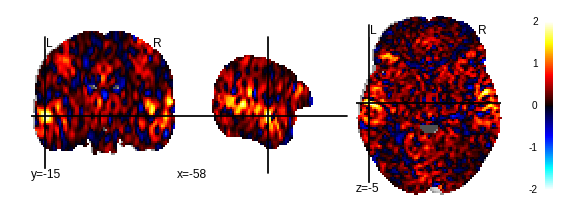

In [31]:
display = plotting.plot_stat_map(meanAudiIm,threshold=1.8);plt.close()
plotting.plot_stat_map(meanAudiIm,threshold=0,cut_coords=display.cut_coords);

In [32]:
%%bash

fslview  ../data/wbet2mm.nii.gz -l Grey -b 200,1000 ../data/auditoryProcessing.nii.gz -l Red-Yellow -b 1.0,2.0

### Erster Versuch im Gedankenlesen

Schauen wir uns nun alle Daten an und versuchen wir einen einzelnen Zeitpunkt finden, bei dem wir glauben sehen zu können, was unsere Versuchsperson wohl gedacht haben mag:

In [33]:
%%bash

fslview ../data/meinHirnbild.nii.gz -l Red-Yellow -b 0.2,1.0 ../data/wbet2mm.nii.gz -l Grey -b 200,1000 

## informationen darüber hinzufügen, wann was passiert ist

Um unsere Vorhersage zu überprüfen, schauen wir nach, was tatsächlich die Instruktion zu dem Zeitpunkt war:

In [38]:
# wir lesen diese Datei in eine Tabelle ein
run1df = pd.read_csv('../data/run001.csv')

In [39]:
# wir wissen, dass die Bedingungen alle 10 Volumen wechselt, diese Info fügen wir auch noch ein
run1df['TR'] = range(0,200,10)

In [40]:
run1df

,condition,content,TR
0,SPRACHE,Sprechen-Tiere,0
1,MOTORIK,Haende-Jonglieren,10
2,GESICHTER,Bekannt-Freunde,20
3,EMOTION,Negativ-Sturm,30
4,RUHE,Ruhe,40
5,MOTORIK,Fuesse-Balltreten,50
6,EMOTION,Positiv-Wald,60
7,GESICHTER,Beruehmt-Filmschauspieler,70
8,SPRACHE,Schreiben-Lebensmittel,80
9,RUHE,Ruhe,90


Das heißt, jetzt können wir unseren Signalverlauf mit einem **Modell** in Verbindung bringen. z.B. könnte ein Modell lauten, dass immer wenn an Motorik gedacht werden soll, die Aktivierung an bestimmten Stellen steigt.

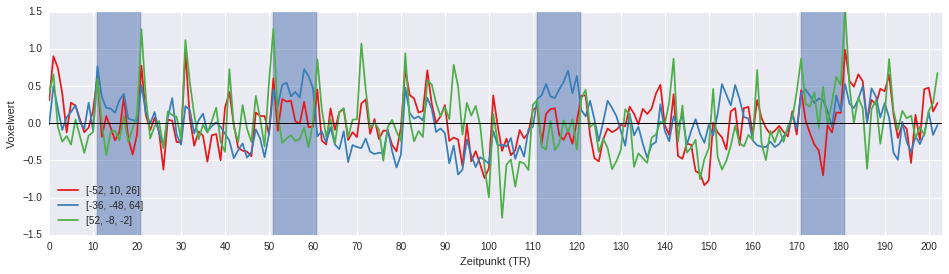

In [41]:
plt.figure(figsize=(16,4))

for entry in run1df.index:
    if run1df.ix[entry]['condition'] == 'MOTORIK':
        start=run1df.ix[entry]['TR']+1
        stop=run1df.ix[entry]['TR']+11
        plt.fill_between([start,stop],[-10,-10],[10,10],alpha=0.5)

for c in range(3):
    plt.plot( stdTimeCourse[:,c],color=myPalette[c],label=sphereMasks.seeds_[c]  )
plt.axhline(0,color='k',linewidth=1)
plt.ylim(-1.5,1.5)
plt.xlim(0,203)
plt.xticks(range(0,203,10))
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
plt.legend(loc='best')
plt.show()

### Jetzt verbinden wir unsere Voxelwerte und unser Design in einer Tabelle

In [42]:
# eine kleine funktion, die daten und design verbindet
def makeIndex(runDf,start=1):
    
    # leere listen in die wir etwas schreiben wollen
    a = [] # hier schreiben wir die bedingung hinein
    b = [] # hier schreiben wir die instuktion hinein
    
    # für jede Zeile in unserer Designtabelle
    for i,entry in enumerate(runDf.index):
        # wir nehmen diese Zeile mal 10, weil in jedem Block 10 Beobachtungen sind
        thisBlock = [runDf.ix[entry][0]]*10
        # wir fügen diese Zeile zu Liste a hinzu
        a.append(thisBlock)
        
        # wir nummerieren die Blöcke aufsteigend, beginnend mit start=1 (s.o.)
        num =  [('00%s'%(i+start))[-3:]]*10
        name = [runDf.ix[entry][1]]*10
        thatBlock = ['%s_%s' % x for x in zip(num,name)]
        # wir fügen diese Zeilen der Liste b hinzu
        b.append(thatBlock)
    
    # wir tun nun etwas besonderes: und zwar verschieben wir die Listen, indem wir einen Platzhalter am
    # Anfang hinzufügen (np.nan) und zwei am Ende. Das heißt, dass wir hier unser Design um 1 Beobachtung
    # (=3 Sekunden) verschieben, weil wir wissen, dass die Sauerstoffversorgung im Gehirn ebenfalls um
    # ca. 3 Sekunden verschoben ist
    c = np.concatenate([ np.array([np.nan]), np.array(a).flatten(), np.array([np.nan,np.nan]) ])
    d = np.concatenate([ np.array([np.nan]), np.array(b).flatten(), np.array([np.nan,np.nan]) ])
    
    return [c,d]

In [43]:
idx = makeIndex(run1df)

In [44]:
print idx

[array(['nan', 'SPRACHE', 'SPRACHE', 'SPRACHE', 'SPRACHE', 'SPRACHE',
       'SPRACHE', 'SPRACHE', 'SPRACHE', 'SPRACHE', 'SPRACHE', 'MOTORIK',
       'MOTORIK', 'MOTORIK', 'MOTORIK', 'MOTORIK', 'MOTORIK', 'MOTORIK',
       'MOTORIK', 'MOTORIK', 'MOTORIK', 'GESICHTER', 'GESICHTER',
       'GESICHTER', 'GESICHTER', 'GESICHTER', 'GESICHTER', 'GESICHTER',
       'GESICHTER', 'GESICHTER', 'GESICHTER', 'EMOTION', 'EMOTION',
       'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION',
       'EMOTION', 'EMOTION', 'RUHE', 'RUHE', 'RUHE', 'RUHE', 'RUHE',
       'RUHE', 'RUHE', 'RUHE', 'RUHE', 'RUHE', 'MOTORIK', 'MOTORIK',
       'MOTORIK', 'MOTORIK', 'MOTORIK', 'MOTORIK', 'MOTORIK', 'MOTORIK',
       'MOTORIK', 'MOTORIK', 'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION',
       'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION',
       'GESICHTER', 'GESICHTER', 'GESICHTER', 'GESICHTER', 'GESICHTER',
       'GESICHTER', 'GESICHTER', 'GESICHTER', 'GESICHTER', 'GESICHTER',
    

#### das sind unsere Daten mit Infos zu den Ereignissen:

In [48]:
fmriDf = pd.DataFrame( stdTimeCourse ,index=idx )
fmriDf

0         1         2
nan       nan                     0.306613 -0.019595  0.403420
SPRACHE   001_Sprechen-Tiere      0.899733  0.501149  0.655382
          001_Sprechen-Tiere      0.744126  0.194954 -0.053640
          001_Sprechen-Tiere      0.398461 -0.091030 -0.248522
          001_Sprechen-Tiere     -0.123714  0.080526 -0.172310
          001_Sprechen-Tiere      0.275558  0.152307 -0.287810
          001_Sprechen-Tiere      0.235735  0.240528  0.052259
          001_Sprechen-Tiere      0.056138  0.025096 -0.169650
          001_Sprechen-Tiere     -0.122046 -0.076269 -0.399066
          001_Sprechen-Tiere     -0.057352  0.274839 -0.168411
          001_Sprechen-Tiere      0.173728 -0.095387 -0.120104
MOTORIK   002_Haende-Jonglieren   0.625649  0.763014  0.595083
          002_Haende-Jonglieren  -0.184449  0.350885 -0.008277
          002_Haende-Jonglieren   0.095230  0.206938 -0.428879
          002_Haende-Jonglieren  -0.058304  0.196594 -0.117341
          002_Haende-Jonglieren  -0.230281  0.140002 -0.100642
          002_Haende-Jonglieren  -0.117602  0.309878 -0.231884
          002_Haende-Jonglieren   0.356132  0.394404  0.092914
          002_Haende-Jonglieren  -0.201283  0.062352 -0.255289
          002_Haende-Jonglieren  -0.420115  0.042360 -0.069977
          002_Haende-Jonglieren  -0.150635  0.026337  0.109157
GESICHTER 003_Bekannt-Freunde     0.773355  0.511836  1.264375
          003_Bekannt-Freunde     0.110158  0.141375  0.348535
          003_Bekannt-Freunde    -0.092945 -0.004571 -0.203870
          003_Bekannt-Freunde     0.071739  0.150233 -0.041460
          003_Bekannt-Freunde    -0.117030 -0.124254  0.029480
          003_Bekannt-Freunde    -0.623795 -0.311441 -0.336499
          003_Bekannt-Freunde     0.047863  0.075586  0.157361
          003_Bekannt-Freunde     0.033920  0.336094  0.109684
          003_Bekannt-Freunde    -0.253268 -0.150771  0.085659
...                                    ...       ...       ...
MOTORIK   018_Fuesse-Fahrrad     -0.134751  0.369605  0.221418
          018_Fuesse-Fahrrad     -0.285132  0.269666  0.416838
          018_Fuesse-Fahrrad     -0.365919  0.333738 -0.062369
          018_Fuesse-Fahrrad     -0.701350  0.307629  0.489890
          018_Fuesse-Fahrrad     -0.027155  0.164531 -0.005396
          018_Fuesse-Fahrrad     -0.124084 -0.051008  0.278277
          018_Fuesse-Fahrrad      0.143907  0.372898  0.623661
          018_Fuesse-Fahrrad      0.137237  0.162318  0.511717
SPRACHE   019_Schreiben-Vornamen  0.986019  0.524731  1.540261
          019_Schreiben-Vornamen  0.567298  0.261853  0.481997
          019_Schreiben-Vornamen  0.491010  0.202408  0.003879
          019_Schreiben-Vornamen  0.656731  0.323870  0.344118
          019_Schreiben-Vornamen  0.564687  0.499497  0.204208
          019_Schreiben-Vornamen  0.032133  0.013021 -0.615290
          019_Schreiben-Vornamen  0.313135  0.469112  0.186618
          019_Schreiben-Vornamen  0.249682  0.358865  0.310194
          019_Schreiben-Vornamen  0.462883  0.077339 -0.276368
          019_Schreiben-Vornamen  0.430032  0.272705  0.120373
RUHE      020_Ruhe                0.653852  0.075902  0.862564
          020_Ruhe                0.120213 -0.396916  0.166448
          020_Ruhe               -0.197993 -0.492395 -0.089120
          020_Ruhe               -0.013407  0.020482  0.166701
          020_Ruhe               -0.073841 -0.248650  0.066512
          020_Ruhe               -0.535449 -0.390086  0.100901
          020_Ruhe                0.113937 -0.174959 -0.200951
          020_Ruhe               -0.226179 -0.280987 -0.047744
          020_Ruhe                0.456232 -0.141403 -0.162276
          020_Ruhe                0.477125  0.147223  0.163356
nan       nan                     0.157597 -0.157070  0.273319
          nan                     0.270613 -0.025460  0.674154

[203 rows x 3 columns]

In [46]:
from sklearn import preprocessing

## Blocks zeitlich zusammenfassen

Warum machen wir das? Der Grund ist, dass wir annehmen, dass innerhalb eines Blocks die Aktivität recht homogen ist. Das wird nicht hundertprozenting so sein, aber es ist ein guter Ausgangspunkt.

In [47]:
def makeBlockDf(fmriDf):
    # wir erstellen eine variable block die uns hilft, den Zeitverlauf in 
    # 20 Beobachtungen a 10 Volumen zusammenzufassen
    fmriDf['block'] = [fmriDf.index.levels[1][x].split('_')[0] for x in fmriDf.index.labels[1]]
    # wir werfen die Zeitpunkte am Anfang und Ende weg, da sie zu keiner der Bedingungen gehören
    fmriDf.drop('nan',level=0,inplace=True)
    # wir mitteln die Werte in einem Block
    blockDf = fmriDf.groupby('block').mean()
    # wir machen uns eine neue Tabelle mit 20 Zeilen (20 blocks statt 203 TRs)
    blockDf.index = [int(x) for x in blockDf.index]
    blockDf.sort_index(inplace=True)
    conds = [ [fmriDf.index.levels[0][x] for x in fmriDf.index.labels[0][::10] ],blockDf.index][0]
    contents = [ [fmriDf.index.levels[1][x] for x in fmriDf.index.labels[1][::10] ],blockDf.index][0]
    blockDf.index = [conds,contents]

    return blockDf

In [49]:
blockDf = makeBlockDf(fmriDf)
blockDf

,,0,1,2
SPRACHE,001_Sprechen-Tiere,0.248036,0.120671,-0.091187
MOTORIK,002_Haende-Jonglieren,-0.028566,0.249276,-0.041514
GESICHTER,003_Bekannt-Freunde,-0.030291,0.033529,0.119806
EMOTION,004_Negativ-Sturm,-0.066750,0.010404,0.102751
RUHE,005_Ruhe,-0.094000,-0.309170,0.100219
MOTORIK,006_Fuesse-Balltreten,0.162139,0.469885,-0.007382
EMOTION,007_Positiv-Wald,-0.015411,-0.248339,0.091355
GESICHTER,008_Beruehmt-Filmschauspieler,-0.064498,-0.361097,0.052907
SPRACHE,009_Schreiben-Lebensmittel,0.306119,0.101585,0.213246
RUHE,010_Ruhe,-0.401827,-0.488755,0.019575


### was hat sich verändert?

so sahen die Daten vorher aus

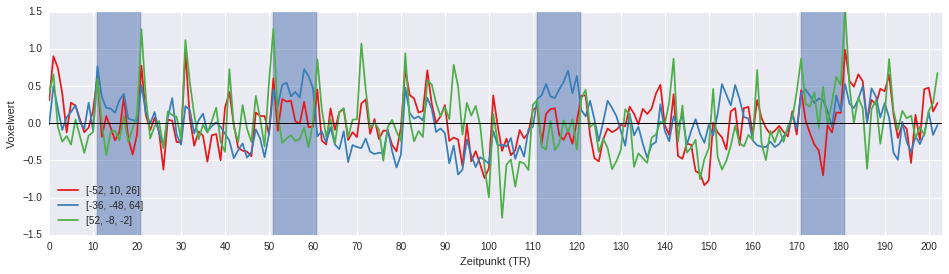

In [50]:
plt.figure(figsize=(16,4))

for entry in run1df.index:
    if run1df.ix[entry]['condition'] == 'MOTORIK':
        start=run1df.ix[entry]['TR']+1
        stop=run1df.ix[entry]['TR']+11
        plt.fill_between([start,stop],[-10,-10],[10,10],alpha=0.5)

for c in range(3):
    plt.plot( stdTimeCourse[:,c],color=myPalette[c],label=sphereMasks.seeds_[c] )
plt.axhline(0,color='k',linewidth=1)
plt.ylim(-1.5,1.5)
plt.xlim(0,203)
plt.xticks(range(0,203,10))
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (TR)')
plt.legend(loc='best')
plt.show()

so sehen die blockweise gemittelten Daten jetzt aus:

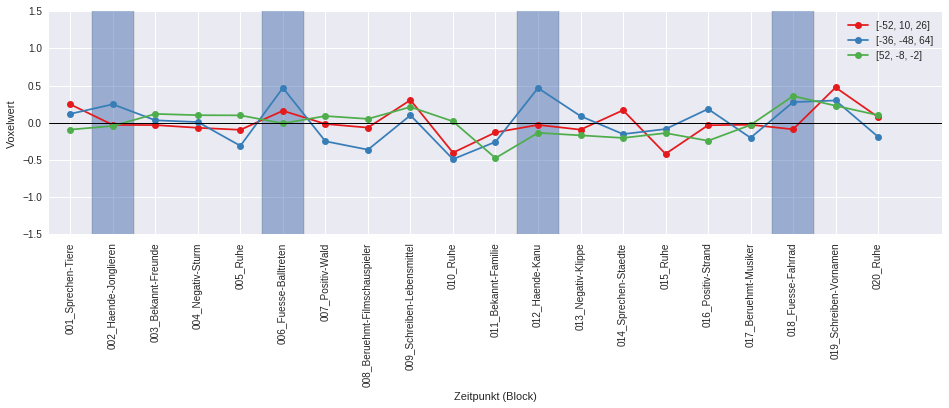

In [51]:
plt.figure(figsize=(16,4))

for i,entry in enumerate(run1df.index):
    if run1df.ix[entry]['condition'] == 'MOTORIK':
        plt.fill_between([i-0.5,i+0.5],[-3,-3],[3,3],alpha=0.5)

for c in range(3):
    plt.plot( blockDf[c].values, '-o',color=myPalette[c],label=sphereMasks.seeds_[c] )
plt.axhline(0,color='k',linewidth=1)
plt.xlim(-0.5,20.5)
plt.ylim(-1.5,1.5)
plt.xticks(range(20),blockDf.index.levels[1],rotation=90)
plt.legend(loc='best')
plt.ylabel('Voxelwert')
plt.xlabel('Zeitpunkt (Block)')

plt.show()

### Tranformation für alle 228483 Voxel im Gehirn!

In [52]:
fmriDf = pd.DataFrame(thisStd,index=idx)

In [53]:
fmriDf

0         1         2         3       \
nan       nan                    -0.071821 -0.005102  0.127040 -0.661352   
SPRACHE   001_Sprechen-Tiere     -0.051077 -0.026953  0.215135 -0.164385   
          001_Sprechen-Tiere      0.557752 -0.400514 -0.883120 -0.550373   
          001_Sprechen-Tiere     -0.641384 -0.826310 -0.889236 -1.537584   
          001_Sprechen-Tiere      0.356853  0.067679 -0.183541 -0.247699   
          001_Sprechen-Tiere     -0.063467  0.324411  0.546579 -0.691776   
          001_Sprechen-Tiere      1.216893  0.455780 -0.014329  0.847893   
          001_Sprechen-Tiere     -0.518674 -0.523698 -0.519409 -0.894478   
          001_Sprechen-Tiere     -2.007880 -2.272760 -2.172458 -2.012390   
          001_Sprechen-Tiere      1.207600  0.675775  0.274380  0.935942   
          001_Sprechen-Tiere     -1.461751 -1.191685 -0.813407 -0.986506   
MOTORIK   002_Haende-Jonglieren  -0.082052 -0.182781 -0.250772  0.146539   
          002_Haende-Jonglieren  -0.017600 -0.089716 -0.099870 -0.829055   
          002_Haende-Jonglieren  -1.518726 -0.752307 -0.266492 -1.145336   
          002_Haende-Jonglieren   0.409323  1.033146  1.231266  1.219199   
          002_Haende-Jonglieren  -0.611004 -0.109999  0.136501 -0.383757   
          002_Haende-Jonglieren  -0.737282 -0.076133  0.332763 -1.005006   
          002_Haende-Jonglieren  -0.370839  0.020413  0.064953 -0.240828   
          002_Haende-Jonglieren  -0.056053  0.374649  0.522910  0.285184   
          002_Haende-Jonglieren   0.596486  1.021396  0.991335  0.584648   
          002_Haende-Jonglieren   0.247689  0.682658  1.016623  0.796979   
GESICHTER 003_Bekannt-Freunde     1.627388  1.064751  0.755791  1.468214   
          003_Bekannt-Freunde     1.540846  0.959326  0.236754  0.864392   
          003_Bekannt-Freunde     1.188076  1.104625  0.921513  0.951830   
          003_Bekannt-Freunde     0.286956  0.215686  0.144271  0.818530   
          003_Bekannt-Freunde    -0.105550 -0.419047 -0.423616 -0.459127   
          003_Bekannt-Freunde    -1.034485 -1.029403 -0.897293 -0.897395   
          003_Bekannt-Freunde    -1.248181 -1.953165 -2.170011 -0.176784   
          003_Bekannt-Freunde    -0.675114 -1.501426 -1.924899 -0.803842   
          003_Bekannt-Freunde    -0.467613 -1.195942 -1.616981 -0.852913   
...                                    ...       ...       ...       ...   
MOTORIK   018_Fuesse-Fahrrad     -1.672605 -2.183449 -2.312636 -1.689033   
          018_Fuesse-Fahrrad     -0.185621 -0.693990 -1.027723 -1.000371   
          018_Fuesse-Fahrrad     -1.476149 -2.014732 -2.216699 -1.647760   
          018_Fuesse-Fahrrad      0.475741 -0.048200 -0.376994 -0.323022   
          018_Fuesse-Fahrrad      0.075288 -0.306846 -0.473830 -0.511506   
          018_Fuesse-Fahrrad     -0.726493 -0.802287 -0.766064 -0.946870   
          018_Fuesse-Fahrrad      1.364472  1.219961  0.923603  0.578276   
          018_Fuesse-Fahrrad     -0.883683 -0.365434  0.031215 -0.737139   
SPRACHE   019_Schreiben-Vornamen  0.591381  0.737492  0.663635  0.488848   
          019_Schreiben-Vornamen  0.806829  0.531080  0.333018  0.219038   
          019_Schreiben-Vornamen -0.817478 -0.274284  0.246650 -1.328734   
          019_Schreiben-Vornamen -0.419247 -0.933392 -1.155171 -0.849193   
          019_Schreiben-Vornamen  0.714092 -0.199588 -0.637897 -0.349321   
          019_Schreiben-Vornamen -0.318156 -0.388588 -0.312532 -0.619130   
          019_Schreiben-Vornamen  0.481404  0.108421 -0.311669  0.110194   
          019_Schreiben-Vornamen  0.661090  0.598465  0.558022  0.639111   
          019_Schreiben-Vornamen  0.483156  0.809927  0.939215 -0.156406   
          019_Schreiben-Vornamen -0.457700 -0.193927  0.092187 -0.475591   
RUHE      020_Ruhe               -1.203852 -1.385824 -1.309634 -0.881911   
          020_Ruhe               -0.861250 -1.303207 -1.350642 -0.986166   
          020_Ruhe               -0.677591 -0.740034 -0.627501 -0.953912   
        

In [54]:
blockDf = makeBlockDf(fmriDf)

In [55]:
blockDf

,,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
SPRACHE,001_Sprechen-Tiere,-0.140514,-0.371828,-0.443941,-0.530136,-0.613649,-0.479550,-0.572757,-0.587454,-0.074291,-0.188256,...,-0.074646,-0.311306,0.316412,0.062514,-0.172097,-0.267199,0.396007,0.157684,-0.257316,0.192871
MOTORIK,002_Haende-Jonglieren,-0.214006,0.192133,0.367922,-0.057143,0.124198,-0.075868,0.067011,0.120012,-0.227784,0.055580,...,-0.112615,-0.452628,-1.009957,-0.644274,-0.218251,0.027464,-0.342304,-0.068679,0.418035,0.145103
GESICHTER,003_Bekannt-Freunde,0.032373,-0.454000,-0.708955,-0.047122,-0.315072,0.283276,0.192932,0.132730,0.743205,-0.052728,...,-0.019987,-0.294361,0.239878,0.175494,0.084894,-0.042502,0.480854,0.450546,0.269346,-0.254813
EMOTION,004_Negativ-Sturm,0.190539,0.143390,0.154897,0.337575,0.222395,0.464983,0.285536,0.167633,0.276302,0.039304,...,0.274546,0.252942,0.342106,0.586692,0.703687,0.649613,0.281995,0.592456,0.716572,-0.032904
RUHE,005_Ruhe,-0.132493,-0.451553,-0.695875,-0.201637,-0.247177,-0.145007,-0.172867,-0.166004,-0.201439,0.094438,...,0.622759,0.379262,0.533495,0.927605,1.123265,1.042033,-0.153883,0.469669,0.975829,-0.933412
MOTORIK,006_Fuesse-Balltreten,-0.046646,0.380891,0.587735,0.481057,0.552740,0.244423,0.257005,0.245815,-0.385189,-0.313267,...,1.087147,1.025245,0.132506,0.572897,0.799825,0.806523,0.302373,0.812978,1.130917,-0.136689
EMOTION,007_Positiv-Wald,0.074964,0.151588,0.172772,0.167813,0.206818,0.065199,0.172775,0.199223,-0.204951,-0.248475,...,0.084524,-0.053885,0.015886,0.084189,0.160738,0.239208,-0.038697,0.076952,0.166916,0.058829
GESICHTER,008_Beruehmt-Filmschauspieler,0.197765,-0.044983,-0.146934,-0.152113,-0.241249,-0.222697,-0.248723,-0.290387,-0.245996,-0.068778,...,-0.501471,-0.249161,-0.014951,-0.428823,-0.655354,-0.689167,-0.318143,-0.715795,-0.911148,0.542167
SPRACHE,009_Schreiben-Lebensmittel,0.312222,0.619267,0.812175,0.306067,0.396408,-0.424724,-0.233004,-0.173763,0.211976,0.486342,...,-0.446500,0.070258,-0.037007,-0.521441,-0.682663,-0.529367,-0.551133,-1.080260,-1.299019,0.194208
RUHE,010_Ruhe,-1.134133,-1.151294,-1.119572,-1.460279,-1.233176,-1.472963,-1.267274,-1.132651,-0.792329,0.238364,...,-0.659132,-0.328056,0.586676,0.142650,-0.294717,-0.655703,-0.626744,-1.209622,-1.518706,-0.302197


### Mittelung über Blöcke

Außerdem können wir die Blöcke auch noch mal nach Bedingung zusammenfassen. Dann haben wir ein Bild pro Bedingung, basierend auf 4 Blöcken x 30 Sekunden = 2 Minuten Hirnaktivität pro Bedingung.

In [56]:
meanDf = blockDf.groupby(level=0).mean()

In [57]:
meanDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
EMOTION,0.302008,0.504183,0.603776,0.515698,0.580947,0.493365,0.526127,0.541175,0.051257,-0.094279,...,-0.064436,0.008625,-0.255115,-0.282671,-0.276714,-0.188680,0.299993,0.246411,0.174767,0.341068
GESICHTER,-0.104690,-0.357553,-0.461387,-0.274352,-0.425201,-0.108958,-0.246074,-0.319461,0.049777,-0.414765,...,-0.303919,-0.361411,0.163780,0.012755,-0.119971,-0.232554,-0.133096,-0.322158,-0.455702,-0.097069
MOTORIK,-0.200457,-0.099212,-0.014651,-0.190305,-0.113963,0.048082,0.091365,0.110077,-0.068442,-0.013565,...,0.431668,0.366627,-0.449934,-0.215506,0.013890,0.155630,-0.015357,0.077839,0.251004,0.222280
RUHE,-0.368781,-0.476155,-0.530459,-0.382794,-0.365599,-0.420468,-0.381474,-0.346287,-0.231091,0.364499,...,-0.112488,-0.085024,0.489657,0.528393,0.424615,0.211535,-0.195972,-0.057267,0.000906,-0.542437
SPRACHE,0.449739,0.499703,0.462481,0.393893,0.383758,0.034892,0.050339,0.049799,0.195694,0.126488,...,0.070934,0.123598,0.001904,-0.039302,-0.006450,0.105457,-0.042084,0.014986,0.032843,0.011855


### Gemittelte Ergebnisse für jeden Block

In [58]:
# Transformation der gemittelten Tabelle zurück ins Hirnbild
thisImg = stdMasker.inverse_transform(np.array(meanDf))

# als Datei speichern, zur späteren Verwendung
thisImg.to_filename('../data/gemittelteHirnbilder.nii.gz')

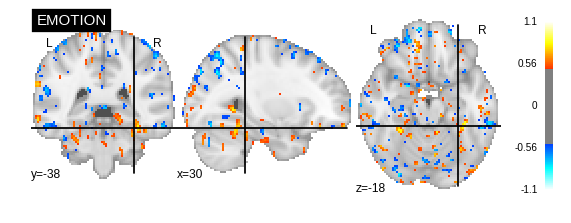

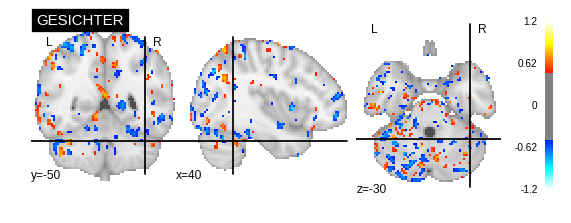

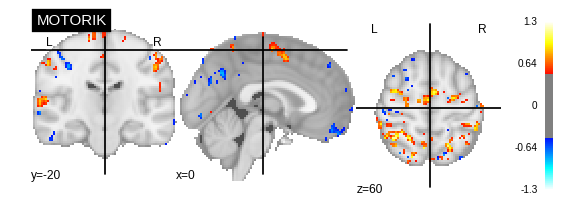

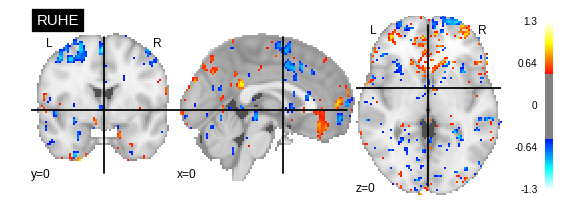

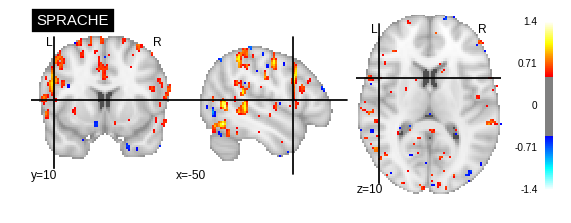

In [59]:
# koordinaten zur visualisierung
myCoords=[(30,-38,-18),(40,-50,-30),(0,-20,60),(0,0,0),(-50,10,10)]

# für die anzahl der bilder (5)
for i in range(thisImg.shape[-1]):
    # nimm das bild an position i
    im = image.index_img(thisImg,i)
    # zeige das bild
    plotting.plot_stat_map(im,threshold=0.5,title=meanDf.index[i],cut_coords=myCoords[i])
    plt.show()

In [60]:
%%bash

fslview ../data/gemittelteHirnbilder.nii.gz

## Räumliche Glättung

Wir haben bisher drei Annahmen verwendet, um unsere Daten zu transformieren:

1. Entscheidend sind die **Veränderungen über die Zeit**
2. Die zeitlichen Veränderungen sollten dem Design entsprechen, d.h. es sollte **homogene 30-Sekunden Blöcke** geben
3. Die Hirnantwort sollte um ca. **drei Sekunden verzögert** sein

Eine vierte Annahme können wir nun noch hinzufügen:

 - Wir erwarten, dass relativ große Gruppen von Neuronen aktivieren, also **räumliche Nachbarschaft** bedeutsam ist

### Beispiel: Was ist der Effekt von räumlicher Glättung?

In [61]:
smooMasker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                     # hier glätten wir mit einem glockenförmigen Filter von 8mm Breite
                                     smoothing_fwhm=8).fit()

In [62]:
# wir glätten die daten und transformieren sie zurück als Hirnbild
smooImg = smooMasker.inverse_transform( smooMasker.transform( fmri_img ) )

### so sah ein Volumen vor der Glättung aus:

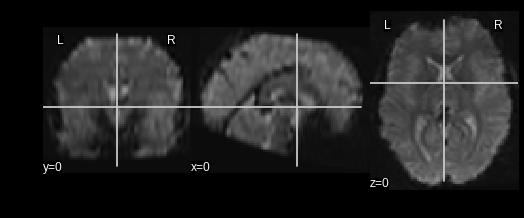

In [63]:
# wir wählen ein Volumen aus der Zeitserie, hier das erste (0)
thisVolume = image.index_img( fmri_img,0 )
# wir zeigen es mit den Koordinaten im Ursprung
plotting.plot_anat(thisVolume,cut_coords=(0,0,0));

### und so nachher:

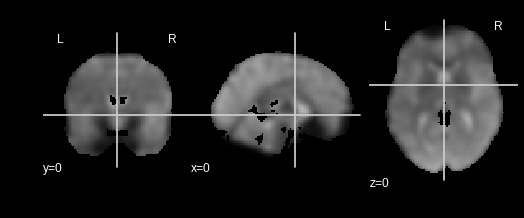

In [64]:
plotting.plot_anat(image.index_img(smooImg,0),cut_coords=(0,0,0));

## Das alles wiederholen wir nun für die ersten beiden Runs

Informationen darüber, wo die Daten liegen:

In [65]:
run1_img = '../data/wrrun001.nii.gz' # bild
run1_confound = '../data/rp_run001.txt' # bewegung
run1_conditions = '../data/run001.csv' # design

In [66]:
run2_img = '../data/wrrun002.nii.gz'
run2_confound = '../data/rp_run002.txt'
run2_conditions = '../data/run002.csv'

Anweisungen darüber, wie die Daten verarbeitet werden sollen

In [67]:
smoo = 8

In [68]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                standardize=True,
                                detrend=True,
                                smoothing_fwhm=smoo).fit()

### Daten in Tabelle umwandeln

In [69]:
run1_data = masker.transform(run1_img,confounds=[run1_confound])
run2_data = masker.transform(run2_img,confounds=[run2_confound])

In [70]:
run1_data

array([[ 0.49442515,  0.50018484,  0.49424635, ...,  1.29979875,
         1.33949977,  1.31624061],
       [ 1.21275716,  1.72371963,  2.26451298, ...,  3.14354188,
         3.4373926 ,  2.61390909],
       [ 0.50939749,  0.12769162, -0.31706434, ...,  1.43271006,
         1.39180188,  1.52601459],
       ...,
       [ 0.72395792,  0.54044472,  0.19353861, ..., -0.44145548,
        -0.27439617, -0.25995595],
       [-0.01318034,  0.13470634,  0.27136827, ...,  1.43180469,
         0.99502802,  1.60522659],
       [-1.12426706, -1.05859594, -0.82983256, ...,  0.15793436,
         0.01847056,  0.47173586]])

In [91]:
# vorverarbeitete Daten als Hirnbilder speichern
masker.inverse_transform(run1_data).to_filename('../data/smoothRun.nii.gz')

### Informationen über Design hinzufügen

In [71]:
run1_idx = makeIndex(pd.read_csv(run1_conditions))
run2_idx = makeIndex(pd.read_csv(run2_conditions),start=21)

### Die beiden Runs in eine große Tabelle stecken

In [72]:
bigDf = pd.concat([pd.DataFrame(run1_data,index=run1_idx),
                   pd.DataFrame(run2_data,index=run2_idx)])

In [73]:
bigDf.shape

(406, 228483)

In [76]:
bigDf

0         1         2         3       \
nan       nan                    0.494425  0.500185  0.494246  0.102253   
SPRACHE   001_Sprechen-Tiere     1.212757  1.723720  2.264513  1.242194   
          001_Sprechen-Tiere     0.509397  0.127692 -0.317064  0.340790   
          001_Sprechen-Tiere    -0.587786 -0.544670 -0.388875 -0.572253   
          001_Sprechen-Tiere     0.186643  0.002967 -0.304111  0.011122   
          001_Sprechen-Tiere    -0.821574 -0.549723 -0.178737 -0.766346   
          001_Sprechen-Tiere     0.707249  0.340646 -0.084960  0.835415   
          001_Sprechen-Tiere    -0.286744 -0.552122 -0.880277 -0.301576   
          001_Sprechen-Tiere    -1.629130 -1.798844 -1.817148 -1.394153   
          001_Sprechen-Tiere     0.688851  0.524499  0.227754  0.793204   
          001_Sprechen-Tiere    -0.608267 -0.508714 -0.270412 -0.616397   
MOTORIK   002_Haende-Jonglieren  1.219435  1.206880  1.102745  1.388134   
          002_Haende-Jonglieren  0.008427 -0.186922 -0.329696 -0.375571   
          002_Haende-Jonglieren -2.147873 -2.125943 -1.957390 -2.152148   
          002_Haende-Jonglieren -0.143093  0.014856  0.059917 -0.093146   
          002_Haende-Jonglieren -1.011742 -1.037064 -0.966016 -1.099550   
          002_Haende-Jonglieren -2.183627 -2.075877 -1.746032 -2.457159   
          002_Haende-Jonglieren -1.148947 -1.050904 -0.900628 -0.866588   
          002_Haende-Jonglieren -0.684837 -0.574726 -0.416260 -0.781632   
          002_Haende-Jonglieren -0.498541 -0.568994 -0.759373 -0.459919   
          002_Haende-Jonglieren -0.013698  0.183192  0.421990 -0.048693   
GESICHTER 003_Bekannt-Freunde    2.368706  2.614294  2.944584  2.430187   
          003_Bekannt-Freunde    1.726890  1.164611  0.418707  1.459984   
          003_Bekannt-Freunde    0.471256  0.207630 -0.062698  0.374775   
          003_Bekannt-Freunde    0.410313  0.355396  0.377840  0.405900   
          003_Bekannt-Freunde    1.010946  0.996360  1.004442  1.067915   
          003_Bekannt-Freunde   -1.456426 -1.817392 -2.155915 -1.254635   
          003_Bekannt-Freunde    0.305961  0.345912  0.391404  0.692172   
          003_Bekannt-Freunde    0.294585 -0.002006 -0.330586  0.171663   
          003_Bekannt-Freunde    0.064207 -0.268499 -0.547010  0.121803   
...                                   ...       ...       ...       ...   
          038_Beruehmt-Sportler  0.418051  0.487558  0.564075  0.150617   
          038_Beruehmt-Sportler -0.634678 -0.714529 -0.725848 -0.548049   
          038_Beruehmt-Sportler -0.333212 -0.562278 -0.653578 -0.494825   
          038_Beruehmt-Sportler -0.170997 -0.311017 -0.515604 -0.044499   
          038_Beruehmt-Sportler -0.904662 -0.996309 -1.023865 -0.824548   
          038_Beruehmt-Sportler -1.128246 -0.843417 -0.497953 -1.152819   
          038_Beruehmt-Sportler  0.221636  0.488861  0.656627  0.220744   
          038_Beruehmt-Sportler -1.237597 -1.053639 -0.791611 -1.445102   
MOTORIK   039_Fuesse-Trampolin   0.041716  0.194399  0.432754  0.244230   
          039_Fuesse-Trampolin  -0.012785 -0.124985 -0.264241 -0.368209   
          039_Fuesse-Trampolin  -1.496046 -1.385313 -1.148797 -1.454004   
          039_Fuesse-Trampolin   0.272489  0.526444  0.754188  0.140479   
          039_Fuesse-Trampolin  -1.593596 -1.440164 -1.207225 -1.810770   
          039_Fuesse-Trampolin  -1.881749 -2.056351 -2.276661 -1.724582   
          039_Fuesse-Trampolin  -0.121556 -0.156391 -0.176625 -0.034245   
          039_Fuesse-Trampolin  -0.066922 -0.468788 -0.968798  0.055302   
          039_Fuesse-Trampolin  -0.478843 -0.582653 -0.775828 -0.636068   
          039_Fuesse-Trampolin  -0.043415 -0.192909 -0.402085 -0.403276   
RUHE      040_Ruhe              -0.782171 -0.529250 -0.267887 -0.863248   
          040_Ruhe              -0.544722 -0.223876 -0.069505 -0.533940   
          040_Ruhe              -0.895900 -0.643787 -0.383089 -0.868856   
          040_Ruhe              -0.575013 -0.414222 -0.24854

Die Tabelle hat 406 Beobachtungen (TRs) und 228483 Feature (Voxel). Das heißt, wir arbeiten mit ~93 Millionen Datenpunkten bei diesen beiden Runs und mit 186 Millionen Datenpunkten, wenn wir die Testdaten berücksichtigen.

### Blockweise mitteln

In [77]:
bigBlockDf = makeBlockDf(bigDf)
bigBlockDf.sort_index(inplace=True)

In [78]:
bigBlockDf

0         1         2       \
EMOTION   004_Negativ-Sturm                0.298437  0.280766  0.226124   
          007_Positiv-Wald                 0.050972  0.166825  0.246762   
          013_Negativ-Klippe               0.110247  0.213807  0.299219   
          016_Positiv-Strand              -0.246740 -0.144198 -0.021383   
          024_Negativ-Waldbrand           -0.478858 -0.454537 -0.469940   
          029_Positiv-See                 -0.233535 -0.269339 -0.262766   
          033_Negativ-Strand               0.435625  0.373756  0.335652   
          036_Positiv-Berg                -0.606882 -0.664675 -0.706450   
GESICHTER 003_Bekannt-Freunde              0.527384  0.333976  0.154485   
          008_Beruehmt-Filmschauspieler   -0.035392 -0.181237 -0.345604   
          011_Bekannt-Familie             -0.245975 -0.265224 -0.228848   
          017_Beruehmt-Musiker             0.174054  0.072537 -0.044816   
          022_Bekannt-Kommilitonen         0.649833  0.590912  0.508608   
          026_Beruehmt-Serienschauspieler -0.157659 -0.165157 -0.122029   
          032_Bekannt-Schulfreunde         0.497532  0.417292  0.332710   
          038_Beruehmt-Sportler           -0.090964 -0.072964 -0.034429   
MOTORIK   002_Haende-Jonglieren           -0.660450 -0.621550 -0.549074   
          006_Fuesse-Balltreten           -0.532900 -0.385512 -0.217303   
          012_Haende-Kanu                  0.085867  0.151571  0.272488   
          018_Fuesse-Fahrrad               0.023669  0.060825  0.059634   
          021_Haende-Boxen                -0.991997 -0.923105 -0.806034   
          028_Fuesse-Hochseil             -0.093036 -0.036726  0.059131   
          034_Haende-Ballwerfen            0.179763  0.189151  0.198696   
          039_Fuesse-Trampolin            -0.538071 -0.568671 -0.603332   
RUHE      005_Ruhe                         0.069575  0.037061  0.008005   
          010_Ruhe                        -0.585204 -0.565841 -0.550450   
          015_Ruhe                         0.323075  0.187385  0.084478   
          020_Ruhe                        -0.383987 -0.471538 -0.561678   
          025_Ruhe                         0.114412  0.085152  0.034121   
          030_Ruhe                         0.738058  0.665159  0.511289   
          035_Ruhe                         0.504715  0.602311  0.692033   
          040_Ruhe                        -0.271100 -0.235799 -0.260020   
SPRACHE   001_Sprechen-Tiere              -0.062860 -0.123455 -0.174932   
          009_Schreiben-Lebensmittel       0.481040  0.696451  0.866260   
          014_Sprechen-Staedte             0.377749  0.280495  0.126578   
          019_Schreiben-Vornamen           0.295741  0.319224  0.356477   
          023_Sprechen-Lebensmittel        0.343107  0.386100  0.416588   
          027_Schreiben-Tiere             -0.010171 -0.005099 -0.053600   
          031_Sprechen-Vornamen           -0.231322 -0.213443 -0.191721   
          037_Schreiben-Staedte            0.511774  0.592085  0.735193   

                                             3         4         5       \
EMOTION   004_Negativ-Sturm                0.300763  0.249581  0.364199   
          007_Positiv-Wald                 0.006890  0.110656 -0.215160   
          013_Negativ-Klippe               0.130578  0.247793 -0.026233   
          016_Positiv-Strand              -0.227940 -0.132042 -0.254361   
          024_Negativ-Waldbrand           -0.593110 -0.522689 -0.741202   
          029_Positiv-See                 -0.297636 -0.331669 -0.324384   
          033_Negativ-Strand               0.409288  0.339520  0.407197   
          036_Positiv-Berg                -0.668864 -0.695710 -0.666422   
GESICHTER 003_Bekannt-Freunde              0.554090  0.389571  0.773092   
          008_Beruehmt-Filmschauspieler   -0.120628 -0.247874 -0.174254   
          011_Bekannt-Familie             -0.165657 -0.164262 -0.091647   
          017_Beruehmt-Musiker             0.293535  0.180042  0.4508

### nun speichern wir das Alles als einzelne Hirnbilder (3D)

In [83]:
# für jede Zeile in unserer Block-weisen Tabelle
for cond,num in bigBlockDf.index:
    
    # wir wählen die aktuelle Zeile aus
    thisDf = bigBlockDf.ix[cond].ix[num]
    
    # wir verwenden unsere Maske, um die Daten zurück in den 3D-Raum zu bringen
    thisImg = masker.inverse_transform(thisDf)
    
    # der Name des Bildes ergibt sich aus dem Index (erste beide Spalten) und dem Grad an Glättung
    thisName = '%s_%s' % (cond, num )
    thisSmoo = ('0%s'%smoo)[-2:]
    # wir speichern das Ganze unter dem entsprechendem Namen ab
    thisImg.to_filename('../training/s%s%s.nii.gz' % (thisSmoo,thisName))

### schauen wir uns an, was wir für Daten geschrieben haben

In [84]:
# Modul um die Linux-Kommandozeile zu verwenden
import os

In [87]:
# packe alle Dateien im Ordner "training" in eine Liste
myList = [x for x in os.listdir('../training/') if x.startswith('s%s'%thisSmoo)]
# sortiere die Liste alphabetisch
myList.sort()

In [88]:
# zeig mir die Liste
myList

['s08EMOTION_004_Negativ-Sturm.nii.gz',
 's08EMOTION_007_Positiv-Wald.nii.gz',
 's08EMOTION_013_Negativ-Klippe.nii.gz',
 's08EMOTION_016_Positiv-Strand.nii.gz',
 's08EMOTION_024_Negativ-Waldbrand.nii.gz',
 's08EMOTION_029_Positiv-See.nii.gz',
 's08EMOTION_033_Negativ-Strand.nii.gz',
 's08EMOTION_036_Positiv-Berg.nii.gz',
 's08GESICHTER_003_Bekannt-Freunde.nii.gz',
 's08GESICHTER_008_Beruehmt-Filmschauspieler.nii.gz',
 's08GESICHTER_011_Bekannt-Familie.nii.gz',
 's08GESICHTER_017_Beruehmt-Musiker.nii.gz',
 's08GESICHTER_022_Bekannt-Kommilitonen.nii.gz',
 's08GESICHTER_026_Beruehmt-Serienschauspieler.nii.gz',
 's08GESICHTER_032_Bekannt-Schulfreunde.nii.gz',
 's08GESICHTER_038_Beruehmt-Sportler.nii.gz',
 's08MOTORIK_002_Haende-Jonglieren.nii.gz',
 's08MOTORIK_006_Fuesse-Balltreten.nii.gz',
 's08MOTORIK_012_Haende-Kanu.nii.gz',
 's08MOTORIK_018_Fuesse-Fahrrad.nii.gz',
 's08MOTORIK_021_Haende-Boxen.nii.gz',
 's08MOTORIK_028_Fuesse-Hochseil.nii.gz',
 's08MOTORIK_034_Haende-Ballwerfen.nii.gz'

### Außerdem speichern wir uns noch die Mittelungen für jede Bedingung  

(8 Blocks, 4 Minuten pro Bedinung)

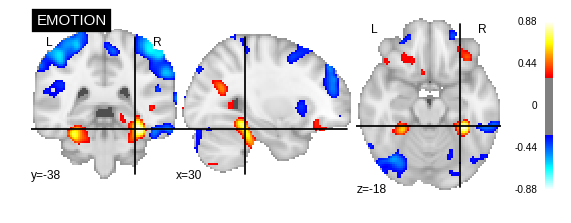

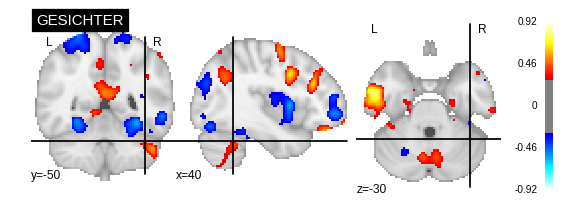

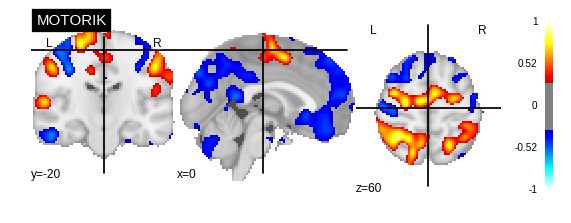

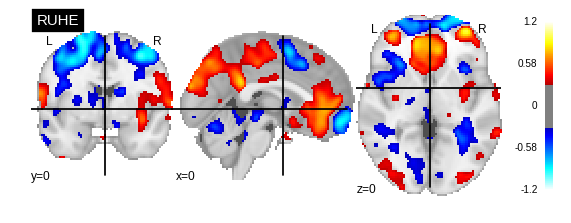

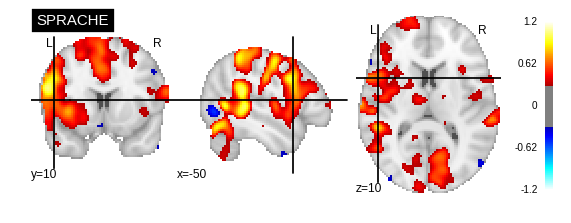

In [89]:
bigMeanDf = bigBlockDf.groupby(level=0).mean() # Blockweise Mittelung
for n,i in enumerate(bigMeanDf.index):
    thisDf = bigMeanDf.loc[i]
    thisImg = masker.inverse_transform(thisDf) # Tabelle in Gehirn umwandeln
    plotting.plot_stat_map(thisImg,title=i,threshold=0.3,cut_coords=myCoords[n])
    plt.show()
    thisSmoo = ('0%s'%smoo)[-2:]
    thisImg.to_filename('../meanData/s%s%s.nii.gz'%(thisSmoo,i)) # als Datei speichern

### Beispiel: Einen Block in FSLView anschauen

In [94]:
%%bash

fslview  ../data/wbet2mm.nii.gz -l Grey -b 200,1000 ../training/s08SPRACHE_014_Sprechen-Staedte.nii.gz  -l Red-Yellow -b 0.5,1.0 